In [1]:
import math
import numpy as np
import scipy.stats as scs
import statsmodels.api as sm
from pylab import mpl, plt

In [2]:
plt.style.use('seaborn-v0_8-darkgrid') # настройка стиля диаграмм
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [3]:
# Определяем функцию для генерации траекторий геометрического броуновского движения
def gen_paths(S0, r, sigma, T, M, I):
    ''' 
    Генерирует траектории геометрического броуновского движения по методу Монте-Карло.
    Параметры:
    S0: float
        Начальный уровень акции/индекса
    r: float
        Постоянная краткосрочная ставка
    sigma: float
        Постоянная волатильность
    T: float
        Конечный временной горизонт
    M: int
        Количество временных шагов/интервалов
    I: int
        Количество моделируемых траекторий
    Возвращает:
    paths: ndarray, shape (M + 1, I)
        Траектории, смоделированные согласно заданным параметрам
    '''
    # Вычисляем длину временного шага
    dt = T / M
    # Создаем массив нулей для хранения траекторий
    paths = np.zeros((M + 1, I))
    # Задаем начальный уровень акции/индекса для всех траекторий
    paths[0] = S0
    # Цикл по временным шагам
    for t in range(1, M + 1):
        # Генерируем стандартные нормальные случайные числа для каждой траектории
        rand = np.random.standard_normal(I)
        # Стандартизируем случайные числа, чтобы иметь нулевое среднее и единичную дисперсию
        rand = (rand - rand.mean()) / rand.std()
        # Вычисляем следующий уровень акции/индекса по формуле геометрического броуновского движения
        paths[t] = paths[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * rand)
    # Возвращаем массив траекторий
    return paths

In [4]:
S0 = 100.
r = 0.05
sigma = 0.2
T = 1.0
M = 50
I = 250000
np.random.seed(1000)

In [5]:
paths = gen_paths(S0, r, sigma, T, M, I)

In [6]:
S0 * math.exp(r * T)

105.12710963760242

In [7]:
paths[-1].mean()

105.12645392478755

Text(0, 0.5, 'Индекс')

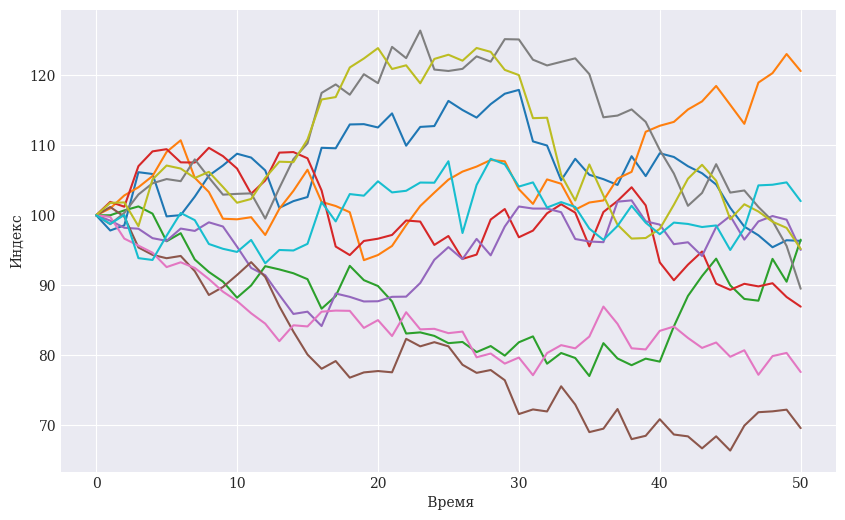

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(paths[:, :10])
plt.xlabel(" Время")
plt.ylabel("Индекс")


In [9]:
paths[:, 0].round(4)

array([100.    ,  97.821 ,  98.5573, 106.1546, 105.899 ,  99.8363,
       100.0145, 102.6589, 105.6643, 107.1107, 108.7943, 108.2449,
       106.4105, 101.0575, 102.0197, 102.6052, 109.6419, 109.5725,
       112.9766, 113.0225, 112.5476, 114.5585, 109.942 , 112.6271,
       112.7502, 116.3453, 115.0443, 113.9586, 115.8831, 117.3705,
       117.9185, 110.5539, 109.9687, 104.9957, 108.0679, 105.7822,
       105.1585, 104.3304, 108.4387, 105.5963, 108.866 , 108.3284,
       107.0077, 106.0034, 104.3964, 101.0637,  98.3776,  97.135 ,
        95.4254,  96.4271,  96.3386])

In [10]:
log_returns = np.log(paths[1:]/paths[:-1])

In [11]:
log_returns[:, 0].round(4)

array([-0.022 ,  0.0075,  0.0743, -0.0024, -0.059 ,  0.0018,  0.0261,
        0.0289,  0.0136,  0.0156, -0.0051, -0.0171, -0.0516,  0.0095,
        0.0057,  0.0663, -0.0006,  0.0306,  0.0004, -0.0042,  0.0177,
       -0.0411,  0.0241,  0.0011,  0.0314, -0.0112, -0.0095,  0.0167,
        0.0128,  0.0047, -0.0645, -0.0053, -0.0463,  0.0288, -0.0214,
       -0.0059, -0.0079,  0.0386, -0.0266,  0.0305, -0.0049, -0.0123,
       -0.0094, -0.0153, -0.0324, -0.0269, -0.0127, -0.0178,  0.0104,
       -0.0009])

In [12]:
def print_statistics(array):
    ''' Вывод основных статистических показателей.

    Параметры
    ---------
    array: ndarray
        Объект, для которого генерируются
        статистические показатели
    '''

    # Вычисляем описательные статистики с помощью функции describe
    sta = scs.describe(array)

    # Форматируем и выводим результаты на экран
    print('%14s %15s' % ('Статистика', 'Значение'))
    print(30 * '-')
    print('%14s %15.5f' % ('size', sta[0])) # Размер выборки
    print('%14s %15.5f' % ('min', sta[1][0])) # Минимальное значение
    print('%14s %15.5f' % ('max', sta[1][1])) # Максимальное значение
    print('%14s %15.5f' % ('mean', sta[2])) # Среднее арифметическое
    print('%14s %15.5f' % ('std', np.sqrt(sta[3]))) # Стандартное отклонение
    print('%14s %15.5f' % ('skew', sta[4])) # Коэффициент асимметрии
    print('%14s %15.5f' % ('kurtosis', sta[5])) # Коэффициент эксцесса

In [13]:
print_statistics(log_returns.flatten())

    Статистика        Значение
------------------------------
          size  12500000.00000
           min        -0.15664
           max         0.15371
          mean         0.00060
           std         0.02828
          skew         0.00055
      kurtosis         0.00085


In [14]:
log_returns.mean() * M + 0.5 * sigma ** 2

0.05000000000000006

In [15]:
log_returns.std() * math.sqrt(M)

0.20000000000000015

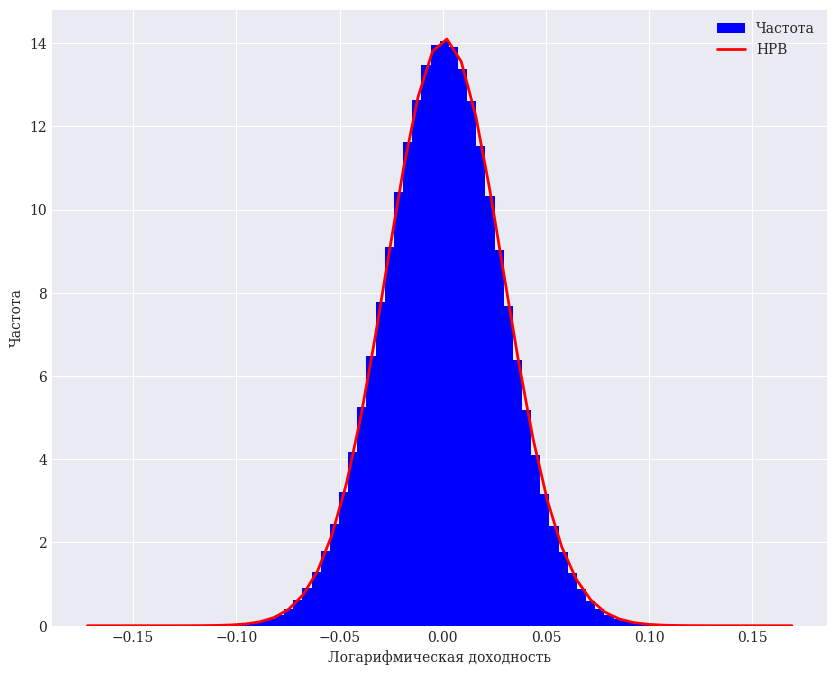

In [18]:
# Импортируем библиотеки для работы с графиками и статистикой
import matplotlib.pyplot as plt
import scipy.stats as scs

# Создаем фигуру с заданным размером в дюймах
plt.figure(figsize=(10, 8))

# Рисуем гистограмму логарифмических доходностей с 70 столбцами, нормализованной по площади
# Добавляем подпись и цвет для гистограммы
plt.hist(log_returns.flatten(), bins=70, density=1, label='Частота', color='b')

# Добавляем подписи для осей x и y
plt.xlabel('Логарифмическая доходность')
plt.ylabel('Частота')

# Создаем массив x из равномерно распределенных точек в диапазоне текущих границ оси x
x = np.linspace(plt.axis()[0], plt.axis()[1])

# Рисуем кривую нормального распределения с параметрами loc и scale, соответствующими средней и стандартному отклонению логарифмических доходностей
# Добавляем подпись и цвет для кривой
plt.plot(x, scs.norm.pdf(x, loc=r / M, scale=sigma / np.sqrt(M)), 'r', lw=2.0, label='HPB')

# Добавляем легенду для графика
plt.legend()

Text(0, 0.5, 'Выборочные квантили')

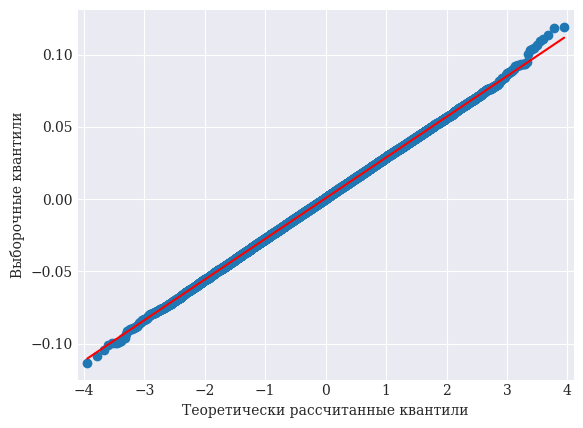

In [19]:
sm.qqplot(log_returns.flatten()[::500], line='s')
plt.xlabel('Теоретически рассчитанные квантили')
plt.ylabel('Выборочные квантили')

In [20]:
def normality_tests(arr):
    """
    Проверка нормального распределения для набора данных.
    Параметры
    ----------
    arr : ndarray
        Объект, для которого генерируются статистические показатели
    """
    # Вычисляем коэффициент асимметрии набора данных
    # Коэффициент асимметрии измеряет степень симметрии распределения
    # Если коэффициент асимметрии близок к нулю, то распределение симметрично
    # Если коэффициент асимметрии положителен, то распределение скошено вправо
    # Если коэффициент асимметрии отрицателен, то распределение скошено влево
    skewness = scs.skew(arr)
    print('Коэффициент асимметрии набора данных %14.3f' % skewness)

    # Вычисляем p-значение коэффициента асимметрии
    # P-значение - это вероятность получить такой или более экстремальный коэффициент асимметрии при условии, что нулевая гипотеза верна
    # Нулевая гипотеза состоит в том, что набор данных имеет нормальное распределение
    # Если p-значение меньше уровня значимости (например, 0.05), то мы отвергаем нулевую гипотезу и заключаем, что распределение не нормально
    # Если p-значение больше уровня значимости, то мы не можем отвергнуть нулевую гипотезу и заключаем, что распределение нормально
    skewness_pvalue = scs.skewtest(arr)[1]
    print('P-значение коэффициента асимметрии %14.3f' % skewness_pvalue)

    # Вычисляем коэффициент эксцесса набора данных
    # Коэффициент эксцесса измеряет степень остроты пика распределения
    # Если коэффициент эксцесса равен нулю, то распределение имеет нормальный пик
    # Если коэффициент эксцесса положителен, то распределение имеет более острый пик, чем нормальное
    # Если коэффициент эксцесса отрицателен, то распределение имеет более плоский пик, чем нормальное
    kurtosis = scs.kurtosis(arr)
    print('Коэффициент эксцесса набора данных %14.3f' % kurtosis)

    # Вычисляем p-значение коэффициента эксцесса
    # P-значение - это вероятность получить такой или более экстремальный коэффициент эксцесса при условии, что нулевая гипотеза верна
    # Нулевая гипотеза состоит в том, что набор данных имеет нормальное распределение
    # Если p-значение меньше уровня значимости (например, 0.05), то мы отвергаем нулевую гипотезу и заключаем, что распределение не нормально
    # Если p-значение больше уровня значимости, то мы не можем отвергнуть нулевую гипотезу и заключаем, что распределение нормально
    kurtosis_pvalue = scs.kurtosistest(arr)[1]
    print('P-значение коэффициента эксцесса %14.3f' % kurtosis_pvalue)

    # Вычисляем p-значение критерия нормальности
    # Критерий нормальности - это статистический тест, который проверяет, является ли набор данных нормально распределенным
    # Критерий нормальности объединяет информацию о коэффициенте асимметрии и коэффициенте эксцесса в одно p-значение
    # Если p-значение меньше уровня значимости (например, 0.05), то мы отвергаем нулевую гипотезу и заключаем, что распределение не нормально
    # Если p-значение больше уровня значимости, то мы не можем отвергнуть нулевую гипотезу и заключаем, что распределение нормально
    normality_pvalue = scs.normaltest(arr)[1]
    print('P-значение критерия нормальности %14.3f' % normality_pvalue)

In [21]:
normality_tests(log_returns.flatten())

Коэффициент асимметрии набора данных          0.001
P-значение коэффициента асимметрии          0.430
Коэффициент эксцесса набора данных          0.001
P-значение коэффициента эксцесса          0.541
P-значение критерия нормальности          0.607


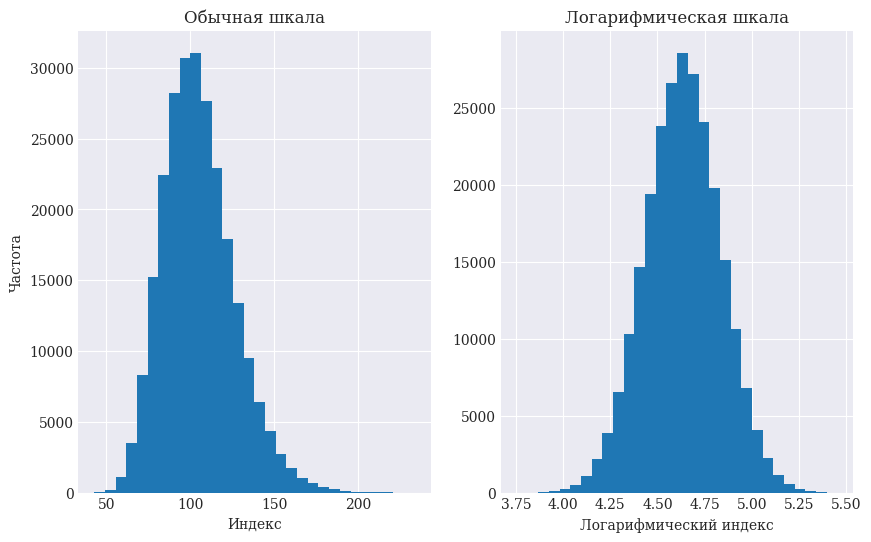

In [22]:
# Создаем фигуру с двумя подграфиками, расположенными в одной строке и двух столбцах
# Устанавливаем размер фигуры в 10 на 6 дюймов
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
# Строим гистограмму распределения последнего элемента массива paths на первом подграфике
# Указываем количество столбцов гистограммы равным 30
ax1.hist(paths[-1], bins=30)
# Устанавливаем подпись оси X как "Индекс"
ax1.set_xlabel('Индекс')
# Устанавливаем подпись оси Y как "Частота"
ax1.set_ylabel('Частота')
# Устанавливаем заголовок подграфика как "Обычная шкала"
ax1.set_title('Обычная шкала')
# Строим гистограмму распределения логарифма последнего элемента массива paths на втором подграфике
# Указываем количество столбцов гистограммы равным 30
ax2.hist(np.log(paths[-1]), bins=30)
# Устанавливаем подпись оси X как "Логарифмический индекс"
ax2.set_xlabel('Логарифмический индекс')
# Устанавливаем заголовок подграфика как "Логарифмическая шкала"
ax2.set_title('Логарифмическая шкала')
# Показываем фигуру с двумя подграфиками
plt.show()

In [23]:
print_statistics(paths[-1])

    Статистика        Значение
------------------------------
          size    250000.00000
           min        42.74870
           max       233.58435
          mean       105.12645
           std        21.23174
          skew         0.61116
      kurtosis         0.65182


In [24]:
print_statistics(np.log(paths[-1]))

    Статистика        Значение
------------------------------
          size    250000.00000
           min         3.75534
           max         5.45354
          mean         4.63517
           std         0.19998
          skew        -0.00092
      kurtosis        -0.00327


In [25]:
normality_tests(np.log(paths[-1]))

Коэффициент асимметрии набора данных         -0.001
P-значение коэффициента асимметрии          0.851
Коэффициент эксцесса набора данных         -0.003
P-значение коэффициента эксцесса          0.744
P-значение критерия нормальности          0.931


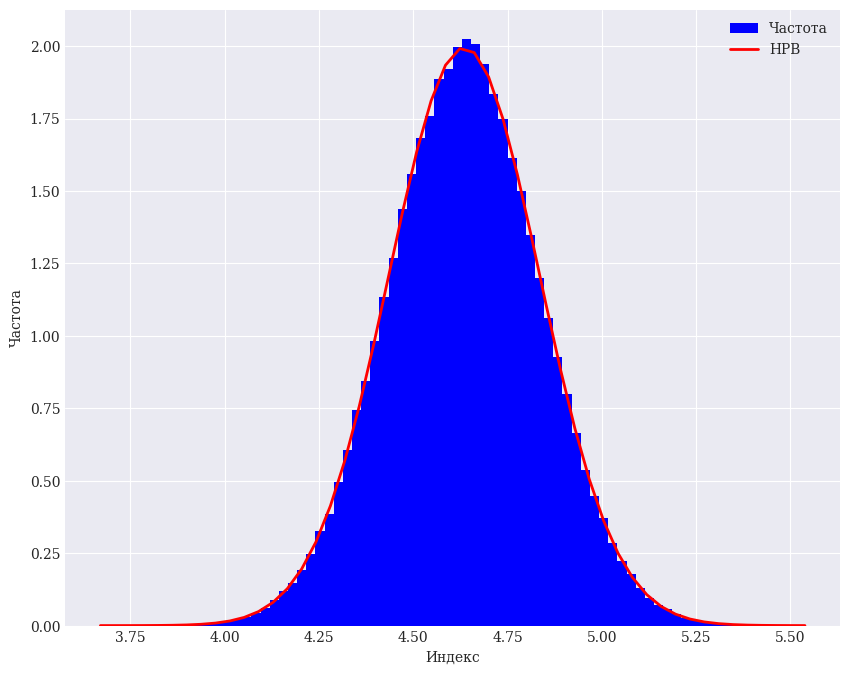

In [27]:
log_data = np.log(paths[-1])

# Создаем фигуру с заданным размером в дюймах
plt.figure(figsize=(10, 8))

# Рисуем гистограмму логарифмических доходностей с 70 столбцами, нормализованной по площади
# Добавляем подпись и цвет для гистограммы
plt.hist(log_data, bins=70, density=1, label='Частота', color='b')

# Добавляем подписи для осей x и y
plt.xlabel('Индекс')
plt.ylabel('Частота')

# Создаем массив x из равномерно распределенных точек в диапазоне текущих границ оси x
x = np.linspace(plt.axis()[0], plt.axis()[1])

# Рисуем кривую нормального распределения с параметрами loc и scale, соответствующими средней и стандартному отклонению логарифмических доходностей
# Добавляем подпись и цвет для кривой
plt.plot(x, scs.norm.pdf(x, log_data.mean(), log_data.std()), 'r', lw=2.0, label='HPB')

# Добавляем легенду для графика
plt.legend()

Text(0, 0.5, 'Выборочные квантили')

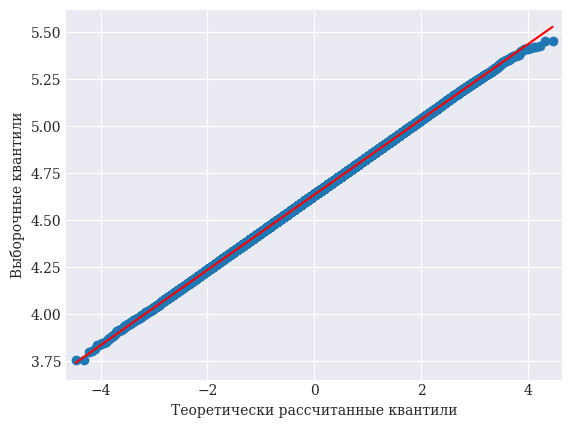

In [28]:
sm.qqplot(log_data, line='s')
plt.xlabel('Теоретически рассчитанные квантили')
plt.ylabel('Выборочные квантили')

In [29]:
import pandas as pd

In [30]:
data = pd.read_csv('BRJ2\Data\BRJ2_Data.csv', index_col=0, parse_dates=False)

In [31]:
data = data[::-1]

In [32]:
data = data['Close']

In [33]:
# формирование подмножества данных и исключение нечисловых значений (NaN))
data = (pd.DataFrame(data).dropna())

In [34]:
# расчёт логарифмической доходности
data['Доходность'] = np.log(data/data.shift(1))

In [35]:
# всегда применяем после shift, т.к. после shift появляются нечисловые значения NaN
data.dropna(inplace=True)

In [36]:
data.head()

,Close,Доходность
Date,,
2022-2-15,90.61,0.000110
2022-2-15,90.55,-0.000662
2022-2-15,90.48,-0.000773
2022-2-15,90.31,-0.001881
2022-2-15,90.27,-0.000443


In [38]:
log_returns_data = data['Доходность']

<Axes: >

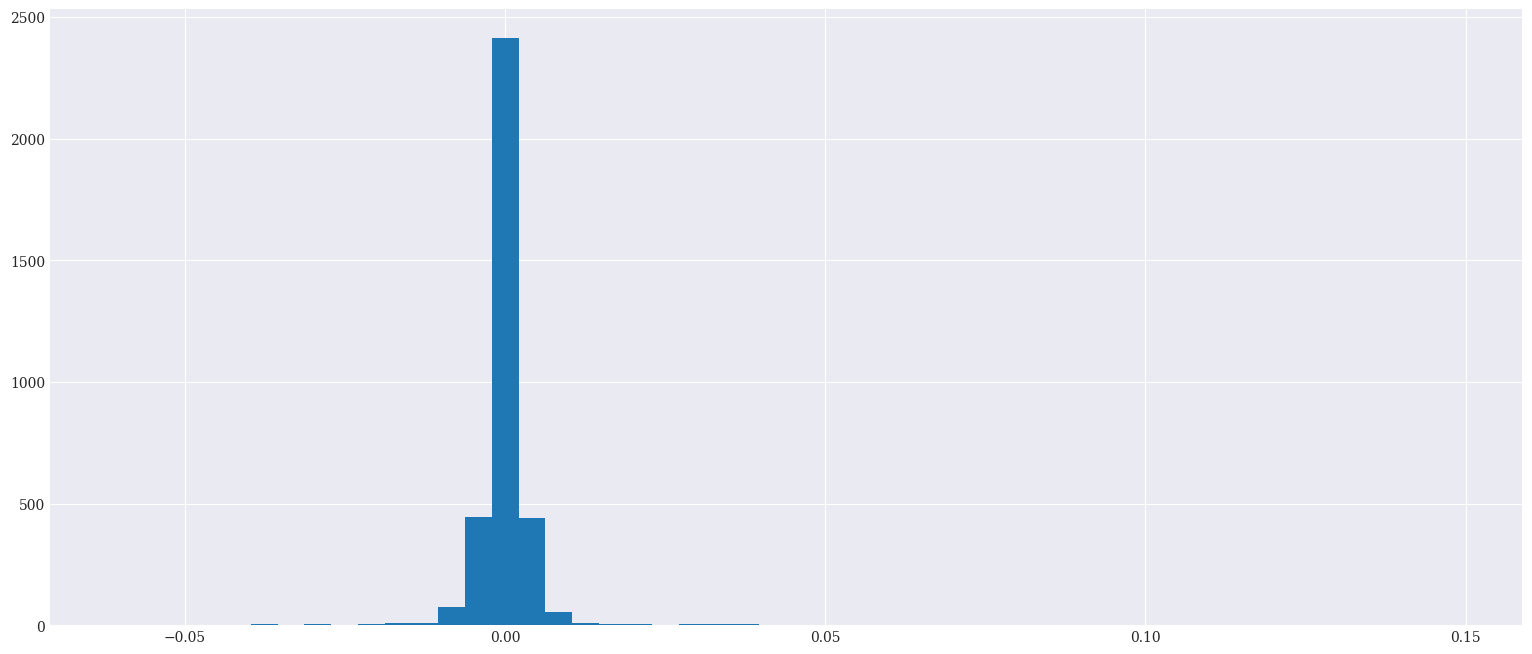

In [39]:
log_returns_data.hist(bins=50, figsize=(19, 8))

In [40]:
print_statistics(log_returns_data)

    Статистика        Значение
------------------------------
          size      3503.00000
           min        -0.06057
           max         0.14841
          mean         0.00006
           std         0.00575
          skew         7.32798
      kurtosis       175.03351


Text(0, 0.5, 'Выборочные квантили')

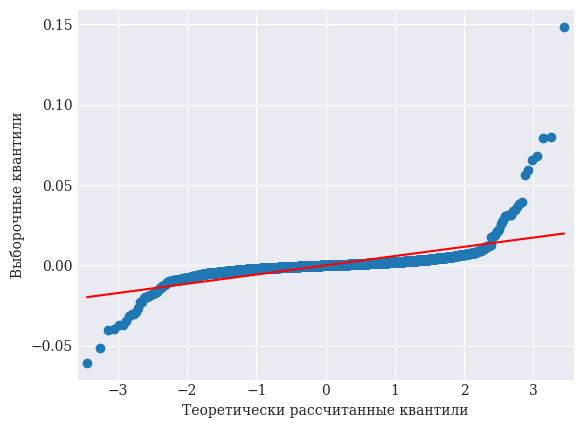

In [41]:
sm.qqplot(log_returns_data, line='s')
plt.xlabel('Теоретически рассчитанные квантили')
plt.ylabel('Выборочные квантили')

In [42]:
normality_tests(log_returns_data)

Коэффициент асимметрии набора данных          7.328
P-значение коэффициента асимметрии          0.000
Коэффициент эксцесса набора данных        175.034
P-значение коэффициента эксцесса          0.000
P-значение критерия нормальности          0.000
